In [6]:
import pickle
text = pickle.load(open("word_data.pkl","rb"))

In [7]:
text

" I hope this email finds you well.\nI am writing to inform you about...\nKindly be advised that...\nI would like to bring to your attention that...\nPlease consider this as a formal request for...\nI trust this email finds you in good health.\nIn accordance with our previous discussion...\nI am pleased to inform you that...\nAttached herewith, please find...\nI would appreciate it if you could...\nPer our conversation...\nThank you for your prompt response.\nYour cooperation in this matter is highly appreciated.\nI would like to express my gratitude for...\nIn reference to our recent meeting...\nPlease find the attached document for your review.\nEnclosed, you will find...\nI am writing to seek clarification on...\nI would like to bring to your attention the following issue...\nAs per your request...\nI am reaching out to you regarding...\nI trust you will find the information provided useful.\nYour immediate attention to this matter is requested.\nWe would like to inform you that...\

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, GRU, Reshape,Dropout

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

In [10]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'your': 3,
 'i': 4,
 'of': 5,
 'for': 6,
 'a': 7,
 'is': 8,
 'and': 9,
 'in': 10,
 'you': 11,
 'we': 12,
 'our': 13,
 'on': 14,
 'team': 15,
 'this': 16,
 'upcoming': 17,
 'recent': 18,
 'attached': 19,
 'are': 20,
 'with': 21,
 'please': 22,
 'am': 23,
 'project': 24,
 'my': 25,
 'appreciate': 26,
 'that': 27,
 "i'm": 28,
 "let's": 29,
 'meeting': 30,
 'support': 31,
 "i'll": 32,
 'find': 33,
 'feedback': 34,
 'work': 35,
 'foster': 36,
 'would': 37,
 'positive': 38,
 'collaboration': 39,
 'attention': 40,
 "it's": 41,
 'time': 42,
 'like': 43,
 'can': 44,
 'about': 45,
 'matter': 46,
 'need': 47,
 'acknowledge': 48,
 'be': 49,
 "what's": 50,
 'it': 51,
 'any': 52,
 'success': 53,
 'details': 54,
 'provide': 55,
 'wanted': 56,
 'encourage': 57,
 'writing': 58,
 'new': 59,
 'culture': 60,
 'have': 61,
 'discuss': 62,
 'me': 63,
 'value': 64,
 "where's": 65,
 'as': 66,
 'cooperation': 67,
 'commitment': 68,
 'will': 69,
 'prompt': 70,
 'review': 71,
 'training': 72

In [11]:
input_sequences = []

for sentances in text.split('\n'):
  tokenized_sentances = tokenizer.texts_to_sequences([sentances])[0]
  for i in range(1, len(tokenized_sentances)):
    input_sequences.append(tokenized_sentances[:i+1])

In [12]:
len(tokenized_sentances)

7

In [13]:
input_sequences

[[4, 145],
 [4, 145, 16],
 [4, 145, 16, 151],
 [4, 145, 16, 151, 173],
 [4, 145, 16, 151, 173, 11],
 [4, 145, 16, 151, 173, 11, 128],
 [4, 23],
 [4, 23, 58],
 [4, 23, 58, 2],
 [4, 23, 58, 2, 80],
 [4, 23, 58, 2, 80, 11],
 [4, 23, 58, 2, 80, 11, 45],
 [180, 49],
 [180, 49, 209],
 [180, 49, 209, 27],
 [4, 37],
 [4, 37, 43],
 [4, 37, 43, 2],
 [4, 37, 43, 2, 174],
 [4, 37, 43, 2, 174, 2],
 [4, 37, 43, 2, 174, 2, 3],
 [4, 37, 43, 2, 174, 2, 3, 40],
 [4, 37, 43, 2, 174, 2, 3, 40, 27],
 [22, 483],
 [22, 483, 16],
 [22, 483, 16, 66],
 [22, 483, 16, 66, 7],
 [22, 483, 16, 66, 7, 843],
 [22, 483, 16, 66, 7, 843, 90],
 [22, 483, 16, 66, 7, 843, 90, 6],
 [4, 110],
 [4, 110, 16],
 [4, 110, 16, 151],
 [4, 110, 16, 151, 173],
 [4, 110, 16, 151, 173, 11],
 [4, 110, 16, 151, 173, 11, 10],
 [4, 110, 16, 151, 173, 11, 10, 293],
 [4, 110, 16, 151, 173, 11, 10, 293, 411],
 [10, 1019],
 [10, 1019, 21],
 [10, 1019, 21, 13],
 [10, 1019, 21, 13, 442],
 [10, 1019, 21, 13, 442, 268],
 [4, 23],
 [4, 23, 116],
 [4

In [14]:
padded_sequence = pad_sequences(input_sequences,padding='pre')

In [15]:
padded_sequence

array([[  0,   0,   0, ...,   0,   4, 145],
       [  0,   0,   0, ...,   4, 145,  16],
       [  0,   0,   0, ..., 145,  16, 151],
       ...,
       [  0,   0,   0, ..., 171,   9, 347],
       [  0,   0,   0, ...,   9, 347, 434],
       [  0,   0,   0, ..., 347, 434, 289]], dtype=int32)

In [16]:
x = padded_sequence[:,:-1]
y = padded_sequence[:,-1]

In [17]:
print(x.shape,y.shape)

(23783, 21) (23783,)


In [18]:
len(tokenizer.index_word)

2030

In [19]:
# Calculate the correct number of classes
num_classes = len(tokenizer.word_index) + 1  # Add 1 to account for 0 index

# One-hot encode y with the correct number of classes
y = to_categorical(y, num_classes=num_classes)

In [20]:
num_classes

2031

In [21]:
y.shape

(23783, 2031)

In [22]:
model = Sequential()

In [23]:
# model.add(Embedding(2031,500,input_length=21))
# model.add(Dropout(0.2))
# model.add(GRU(500))
# model.add(Dense(2031,activation='softmax'))

# can also use LSTM
model.add(Embedding(2031,200,input_length=21))
model.add(Dropout(0.2))
model.add(LSTM(200))
model.add(Dense(2031,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
model.fit(x,y,epochs=50,batch_size=32,validation_data=(x,y))

Epoch 1/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.0747 - loss: 6.1178 - val_accuracy: 0.1752 - val_loss: 4.8065
Epoch 2/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.2082 - loss: 4.5878 - val_accuracy: 0.3074 - val_loss: 3.6790
Epoch 3/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.3223 - loss: 3.6052 - val_accuracy: 0.4026 - val_loss: 2.9794
Epoch 4/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4020 - loss: 2.9716 - val_accuracy: 0.4714 - val_loss: 2.4923
Epoch 5/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4563 - loss: 2.5336 - val_accuracy: 0.5243 - val_loss: 2.1272
Epoch 6/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5109 - loss: 2.1754 - val_accuracy: 0.5690 - val_loss: 1.8444
Epoch 7/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5508 - loss: 1.9233 - val_accuracy: 0.6097 - val_loss: 1.6180
Epoch 8/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5904 - loss: 1.6953 - val_accur

In [26]:
# # can also use LSTM
# model.add(Embedding(666,150,input_length=58))
# model.add(LSTM(200))
# model.add(Dense(666,activation='softmax'))

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 21, 200)             │         406,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 21, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 200)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2031)                │         408,231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,405,695 (12.99 MB)

 Trainable params: 1,135,231 (4.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,270,464 (8.66 MB)

In [28]:
from tensorflow.keras.utils import plot_model
import numpy as np
import time

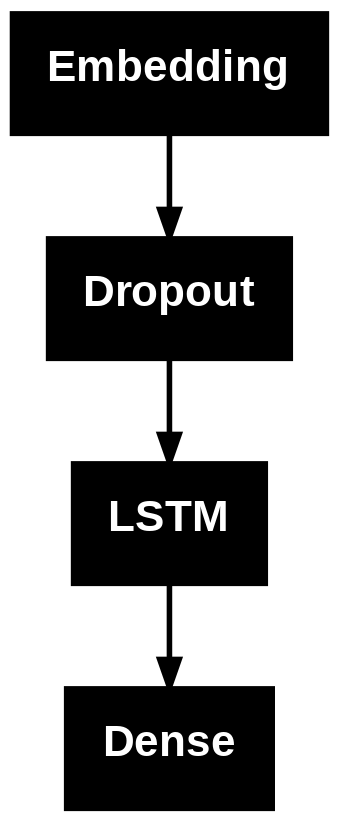

In [29]:
plot_model(model)

In [47]:
input_text = input(str("Type Here..."))
# Predict the next 5 words
for _ in range(19):
    # Tokenize and pad the input text
    tokenized_text = tokenizer.texts_to_sequences([input_text])  # Convert to tokenized sequences
    padded_text = pad_sequences(tokenized_text, maxlen=58, padding='pre')  # Ensure proper padding

    # Predict the next word
    pred_y = model.predict(padded_text)
    pos = np.argmax(pred_y)  # Get the index of the predicted word

    # Find the word corresponding to the predicted index
    word = next((word for word, index in tokenizer.word_index.items() if index == pos), None)

    if word:  # If a word is found, append it to the input text
        input_text = input_text+ " "+ word
        time.sleep(2)
        print(input_text)  # Print the predicted word
    else:
        print("Prediction index not found in tokenizer.word_index.")
        break

Type Here...hey there
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
hey there are
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
hey there are any
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
hey there are any updates
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
hey there are any updates i
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
hey there are any updates i will
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
hey there are any updates i will be
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
hey there are any updates i will be sure
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
hey there are any updates i will be sure to
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
hey there are any updates i will be sure to inform
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
hey there are any updates i will be sure to inform you
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
hey there are any updates i will be sure to inform you promptly
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
hey there are any updates i will be sure to inform you promptly to
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
hey the

In [46]:
print(f"Generated Words By model - \n\n  {input_text}")

Generated Words By model - 

  movie is not  analysis about the event i'd like to you regarding some guidance on the new software schedule for next week for


In [48]:
import pickle
import joblib

In [50]:
pickle.dump(model,open("next_word_predictor.pkl","wb"))

In [51]:
from google.colab import files
files.download('next_word_predictor.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
pickle.dump(model,open("next_word.pkl","wb"))

In [53]:
pickle.dump(tokenizer,open("tokenizer.pkl","wb"))
pickle.dump(pad_sequences,open("pad_sequence.pkl","wb"))

In [36]:
# So I spent a few hours making something for fun. . . If you don't know I am a HUGE

In [37]:
# input_text = "i am comming "
# for i in range(5):
#   # tokenize
#   tokenized_text = tokenizer.texts_to_sequences(["kill"])[0]  # Use texts_to_sequences to get the tokenized sequences
#   # padding
#   # Enclose tokenized_text in a list to make it a list of sequences
#   paded_text = pad_sequences([tokenized_text], maxlen=58, padding='pre')
#   # prediction
#   pred_y = model.predict(paded_text)
#   pos = np.argmax(pred_y)
#   for word,index in tokenizer.word_index.items():
#     if index == pos:
#       input_text = input_text+ " "+ word
#       time.sleep(2)
#       print(input_text)